<a href="https://colab.research.google.com/github/KevinJayne2023/MedMNIST_Data_Neural_Network_Classification/blob/main/MedMNIST_Data_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tensor_reloaded_multi_task_med_mnist_path = kagglehub.competition_download('tensor-reloaded-multi-task-med-mnist')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/tissuemnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/organamnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/octmnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/organsmnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/retinamnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/pneumoniamnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/breastmnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/organcmnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/dermamnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/pathmnist.npz
/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/bloodmnist.npz


## Blood Data

In [ ]:
data_blood = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/bloodmnist.npz')
print(len(data_blood))
data_blood.files

6


['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [ ]:
print(data_blood['train_images'].shape)
print(data_blood['train_labels'].shape)
print(data_blood['val_images'].shape)
print(data_blood['val_labels'].shape)
print(data_blood['test_images'].shape)
print(data_blood['test_labels'].shape)

(11959, 28, 28, 3)
(11959, 1)
(1712, 28, 28, 3)
(1712, 1)
(3421, 28, 28, 3)
(3421, 1)


In [ ]:
unique_blood = np.unique(data_blood['train_labels'])
print(unique_blood)

[0 1 2 3 4 5 6 7]


In [ ]:
print(data_blood['train_images'][0].shape, data_blood['train_labels'][0].shape)

(28, 28, 3) (1,)


In [ ]:
X_train_blood = data_blood['train_images']
y_train_blood = data_blood['train_labels']
X_test_blood = data_blood['test_images']
y_test_blood = data_blood['test_labels']
X_val_blood = data_blood['val_images']
y_val_blood = data_blood['val_labels']

Label: [3]


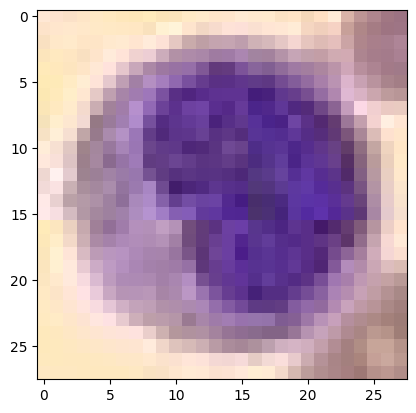

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_blood[sample_index]);
print(f"Label: {y_train_blood[sample_index]}")

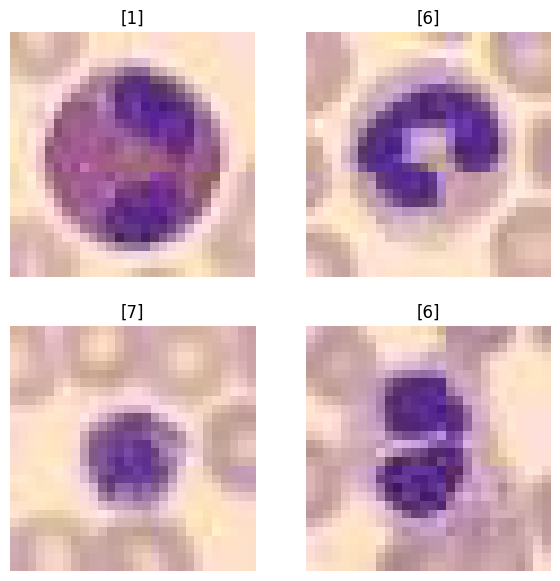

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_blood)))
  plt.imshow(X_train_blood[rand_index], cmap=plt.cm.binary)
  plt.title(y_train_blood[rand_index])
  plt.axis(False)

In [ ]:
y_train_blood = np.array(y_train_blood).ravel()
y_test_blood = np.array(y_test_blood).ravel()
y_val_blood = np.array(y_val_blood).ravel()
y_train_blood.shape, y_test_blood.shape, y_val_blood.shape

((11959,), (3421,), (1712,))

In [ ]:
X_train_blood = X_train_blood / 255
X_test_blood = X_test_blood / 255
X_val_blood = X_val_blood / 255
X_train_blood.min(), X_train_blood.max()

(0.0, 1.0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
# from tpot import TPOTClassifier
# from scikeras.wrappers import KerasClassifier
import keras_tuner as kt
# from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers

## Tune Hyperparameters for Model

In [ ]:
# Define Model
def create_model(hp):

    model = Sequential()

    model.add(Conv2D(
        filters=hp.Int('neurons1', min_value=8, max_value=64, step=8),
        kernel_size=(3, 3),
        activation='leaky_relu',
        input_shape=(28, 28, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('neurons2', min_value=8, max_value=64, step=8),
        kernel_size=(3, 3),
        activation='leaky_relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten(input_shape=(28, 28, 3)))
    model.add(Dense(units=hp.Int('neurons3', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=hp.Int('neurons4', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(units=hp.Int('neurons5', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(8, activation='softmax'))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up KerasTuner
tuner = kt.Hyperband(
    create_model,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='/kaggle/working/tuning_results7',
    project_name='tuning_example7'
)

# Perform the search
tuner.search(X_train_blood, y_train_blood, epochs=5, validation_data=(X_val_blood, y_val_blood))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Model: {best_model}")
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Best val_accuracy So Far: 0.8995327353477478
# Total elapsed time: 00h 04m 46s
# Best Model: <Sequential name=sequential, built=True>
# Best Hyperparameters: {'neurons1': 40, 'neurons2': 48, 'neurons3': 72,
#                        'neurons4': 24, 'neurons5': 40, 'optimizer': 'rmsprop',
#                        'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1,
#                        'tuner/round': 1, 'tuner/trial_id': '0020'}

Trial 30 Complete [00h 00m 09s]
val_accuracy: 0.827102780342102

Best val_accuracy So Far: 0.8901869058609009
Total elapsed time: 00h 04m 17s
Best Model: <Sequential name=sequential, built=True>
Best Hyperparameters: {'neurons1': 56, 'neurons2': 16, 'neurons3': 120, 'neurons4': 120, 'neurons5': 56, 'optimizer': 'adam', 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0011'}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_0 = Sequential()

model_0.add(Conv2D(40, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model_0.add(MaxPooling2D(pool_size=(2, 2)))

model_0.add(Conv2D(48, (3, 3), activation='relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0 = Sequential()

model_0.add(Flatten())
model_0.add(Dense(88, activation='leaky_relu'))
model_0.add(Dropout(0.25))
model_0.add(Dense(88, activation='leaky_relu'))
model_0.add(Dense(64, activation='leaky_relu'))
model_0.add(Dense(9, activation='softmax'))

model_0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_0.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_0 = model_0.fit(X_train_blood,
                        y_train_blood,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_blood, y_val_blood),
                        callbacks=[early_stopping])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3898 - loss: 1.5913 - val_accuracy: 0.6326 - val_loss: 1.0082
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6123 - loss: 1.0197 - val_accuracy: 0.6454 - val_loss: 0.8760
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6703 - loss: 0.9010 - val_accuracy: 0.6273 - val_loss: 0.9952
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6805 - loss: 0.8807 - val_accuracy: 0.7237 - val_loss: 0.7388
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7038 - loss: 0.7949 - val_accuracy: 0.7535 - val_loss: 0.6771
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7131 - loss: 0.7730 - val_accuracy: 0.7599 - val_loss: 0.6607
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7250 - loss: 0.7416 - val_accuracy: 0.7634 - val_loss: 0.6794
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7311 - loss: 0.7153 - val_accu

In [ ]:
# Model evaluation
from sklearn.metrics import classification_report
y_preds_blood = model_0.predict(X_test_blood)
y_preds_blood = y_preds_blood.argmax(axis=1)

loss, accuracy = model_0.evaluate(X_test_blood, y_test_blood)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("---")

print(classification_report(y_test_blood, y_preds_blood, labels=[0,1,2,3,4,5,6,7,8]))

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.5340
Model loss on test set: 0.5354057550430298
Model accuracy on test set: 80.39%
---
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       244
           1       0.93      0.92      0.93       624
           2       0.84      0.74      0.79       311
           3       0.62      0.64      0.63       579
           4       0.85      0.67      0.75       243
           5       0.64      0.58      0.61       284
           6       0.86      0.92      0.89       666
           7       0.93      1.00      0.96       470
           8       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80      3421
   macro avg       0.70      0.68      0.69      3421
weighted avg       0.80      0.80      0.80      3421



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
y_preds_blood[:5]

array([3, 0, 1, 3, 5])

In [ ]:
np.save('/kaggle/working/y_preds_blood1.npy', y_preds_blood)

## Breast Data

In [ ]:
breast_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/breastmnist.npz')
print(len(breast_data))
breast_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
print(breast_data['train_images'].shape)
print(breast_data['val_images'].shape)
print(breast_data['test_images'].shape)
print(breast_data['train_labels'].shape)
print(breast_data['val_labels'].shape)
print(breast_data['test_labels'].shape)

(546, 28, 28)
(78, 28, 28)
(156, 28, 28)
(546, 1)
(78, 1)
(156, 1)


In [ ]:
unique_labels = np.unique(breast_data['train_labels'])

print(unique_labels)

[0 1]


In [ ]:
breast_data['train_images'][0].shape, breast_data['train_labels'][0].shape

((28, 28), (1,))

In [ ]:
X_train_breast = breast_data['train_images']
X_val_breast = breast_data['val_images']
X_test_breast = breast_data['test_images']
y_train_breast = breast_data['train_labels']
y_val_breast = breast_data['val_labels']
y_test_breast = breast_data['test_labels']

Label: [1]


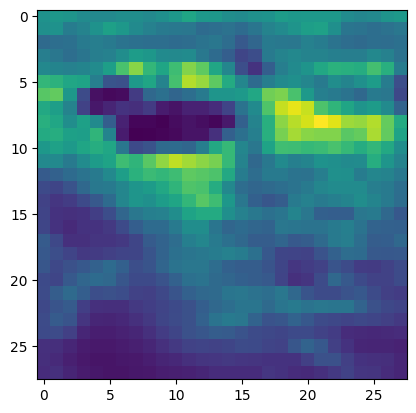

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_breast[sample_index]);
print(f"Label: {y_train_breast[sample_index]}")

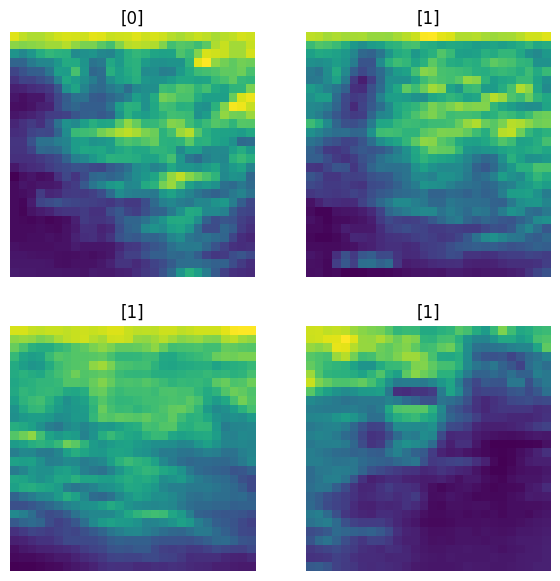

In [ ]:
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_breast)))
  plt.imshow(X_train_breast[rand_index])
  plt.title(y_train_breast[rand_index])
  plt.axis(False)

In [ ]:
y_train_breast = np.array(y_train_breast).ravel()
y_val_breast = np.array(y_val_breast).ravel()
y_test_breast = np.array(y_test_breast).ravel()
y_train_breast.shape, y_val_breast.shape, y_test_breast.shape

((546,), (78,), (156,))

In [ ]:
X_train_breast = X_train_breast / 255
X_test_breast = X_test_breast / 255
X_val_breast = X_val_breast / 255
X_train_breast.min(), X_train_breast.max()

(0.0, 1.0)

In [ ]:
# Adding dimension for grayscale
import tensorflow as tf
X_train_breast = tf.expand_dims(X_train_breast, axis=-1)
X_test_breast = tf.expand_dims(X_test_breast, axis=-1)
X_val_breast = tf.expand_dims(X_val_breast, axis=-1)

In [ ]:
X_train_breast.shape, X_test_breast.shape, X_val_breast.shape

(TensorShape([546, 28, 28, 1]),
 TensorShape([156, 28, 28, 1]),
 TensorShape([78, 28, 28, 1]))

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(40, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(48, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1 = Sequential()

model_1.add(Flatten())
model_1.add(Dense(88, activation='leaky_relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(88, activation='leaky_relu'))
model_1.add(Dense(64, activation='leaky_relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_1 = model_1.fit(X_train_breast,
                        y_train_breast,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_breast, y_val_breast),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.7119 - loss: 0.5875 - val_accuracy: 0.7436 - val_loss: 0.5632
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.5362 - val_accuracy: 0.7692 - val_loss: 0.4944
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7615 - loss: 0.5094 - val_accuracy: 0.7949 - val_loss: 0.4789
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7819 - loss: 0.4858 - val_accuracy: 0.7821 - val_loss: 0.4784
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7720 - loss: 0.4823 - val_accuracy: 0.8333 - val_loss: 0.4741
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.4848 - val_accuracy: 0.8077 - val_loss: 0.4622
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7786 - loss: 0.4929 - val_accuracy: 0.8077 - val_loss: 0.4866
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.4890 - val_accuracy: 0.7564 -

In [ ]:
loss, accuracy = model_1.evaluate(X_test_breast, y_test_breast)
y_preds_breast = model_1.predict(X_test_breast)
y_preds_breast = (y_preds_breast > .5).astype(int)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_breast, y_preds_breast))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7819 - loss: 0.4413
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Model loss on test set: 0.4453999102115631
Model accuracy on test set: 80.13%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        42
           1       0.83      0.91      0.87       114

    accuracy                           0.80       156
   macro avg       0.75      0.71      0.72       156
weighted avg       0.79      0.80      0.79       156



In [ ]:
np.save('/kaggle/working/y_preds_breast.npy', y_preds_breast)

## Derma Data

In [ ]:
derma_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/dermamnist.npz')
print(len(derma_data))
derma_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
print(derma_data['train_images'].shape)
print(derma_data['val_images'].shape)
print(derma_data['test_images'].shape)
print(derma_data['train_labels'].shape)
print(derma_data['val_labels'].shape)
print(derma_data['test_labels'].shape)

(7007, 28, 28, 3)
(1003, 28, 28, 3)
(2005, 28, 28, 3)
(7007, 1)
(1003, 1)
(2005, 1)


In [ ]:
X_train_derma = derma_data['train_images']
X_val_derma = derma_data['val_images']
X_test_derma = derma_data['test_images']
y_train_derma = derma_data['train_labels']
y_val_derma = derma_data['val_labels']
y_test_derma = derma_data['test_labels']
X_train_derma.shape, y_train_derma.shape

((7007, 28, 28, 3), (7007, 1))

In [ ]:
# Unique Labels
unique_derma = np.unique(derma_data['train_labels'])
print(unique_derma)

[0 1 2 3 4 5 6]


Label: [5]


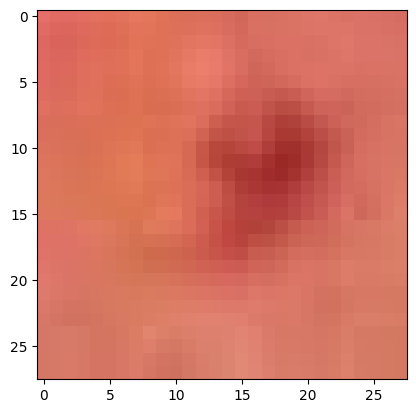

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_derma[sample_index]);
print(f"Label: {y_train_derma[sample_index]}")

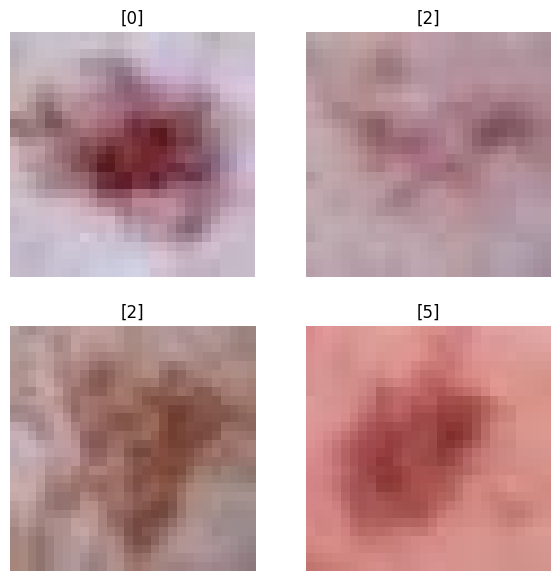

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_derma)))
  plt.imshow(X_train_derma[rand_index])
  plt.title(y_train_derma[rand_index])
  plt.axis(False)

In [ ]:
y_train_derma = np.array(y_train_derma).ravel()
y_val_derma = np.array(y_val_derma).ravel()
y_test_derma = np.array(y_test_derma).ravel()
y_train_derma, y_val_derma, y_test_derma

(array([0, 5, 5, ..., 2, 5, 5], dtype=uint8),
 array([5, 5, 5, ..., 2, 5, 5], dtype=uint8),
 array([5, 3, 4, ..., 5, 5, 5], dtype=uint8))

In [ ]:
X_train_derma = X_train_derma / 255
X_test_derma = X_test_derma / 255
X_val_derma = X_val_derma / 255
X_train_derma.min(), X_train_derma.max()

(0.0, 1.0)

In [ ]:
X_train_derma.shape, X_test_derma.shape, X_val_derma.shape

((7007, 28, 28, 3), (2005, 28, 28, 3), (1003, 28, 28, 3))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_3 = Sequential()

model_3.add(Conv2D(40, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_3.add(Flatten())

# Fully connected layers
model_3.add(Dense(128, activation='leaky_relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(88, activation='leaky_relu'))
model_3.add(Dense(64, activation='leaky_relu'))
model_3.add(Dense(7, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_3.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_3 = model_3.fit(X_train_derma,
                        y_train_derma,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_derma, y_val_derma),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 40)          │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          23,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 88)                  │          11,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,655 (963.50 KB)

 Trainable params: 246,655 (963.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6467 - loss: 1.1406 - val_accuracy: 0.6680 - val_loss: 0.9101
Epoch 2/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6858 - loss: 0.9140 - val_accuracy: 0.6800 - val_loss: 0.8556
Epoch 3/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6933 - loss: 0.8739 - val_accuracy: 0.6770 - val_loss: 0.8877
Epoch 4/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6975 - loss: 0.8387 - val_accuracy: 0.6939 - val_loss: 0.8091
Epoch 5/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7120 - loss: 0.7982 - val_accuracy: 0.7039 - val_loss: 0.7991
Epoch 6/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7157 - loss: 0.7846 - val_accuracy: 0.7019 - val_loss: 0.7783
Epoch 7/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7274 - loss: 0.7634 - val_accuracy: 0.6949 - val_loss: 0.7731
Epoch 8/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7256 - loss: 0.7367 - val_acc

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_3.evaluate(X_test_derma, y_test_derma)
y_preds_derma = model_3.predict(X_test_derma)
y_preds_derma = y_preds_derma.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_derma, y_preds_derma))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7356 - loss: 0.6979
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Model loss on test set: 0.7009824514389038
Model accuracy on test set: 73.82%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.38      0.38        66
           1       0.43      0.29      0.35       103
           2       0.54      0.46      0.50       220
           3       0.00      0.00      0.00        23
           4       0.45      0.26      0.33       223
           5       0.82      0.94      0.87      1341
           6       0.73      0.38      0.50        29

    accuracy                           0.74      2005
   macro avg       0.48      0.39      0.42      2005
weighted avg       0.70      0.74      0.71      2005



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.save('/kaggle/working/y_preds_derma.npy', y_preds_derma)

## Oct Data

In [ ]:
oct_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/octmnist.npz')
print(len(oct_data))
oct_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
print(oct_data['train_images'].shape)
print(oct_data['val_images'].shape)
print(oct_data['test_images'].shape)
print(oct_data['train_labels'].shape)
print(oct_data['val_labels'].shape)
print(oct_data['test_labels'].shape)

(97477, 28, 28)
(10832, 28, 28)
(1000, 28, 28)
(97477, 1)
(10832, 1)
(1000, 1)


In [ ]:
X_train_oct = oct_data['train_images']
X_val_oct = oct_data['val_images']
X_test_oct = oct_data['test_images']
y_train_oct = oct_data['train_labels']
y_val_oct = oct_data['val_labels']
y_test_oct = oct_data['test_labels']
X_train_oct.shape, y_train_oct.shape

((97477, 28, 28), (97477, 1))

In [ ]:
unique_oct = np.unique(y_train_oct)
print(unique_oct)

[0 1 2 3]


Label: [3]


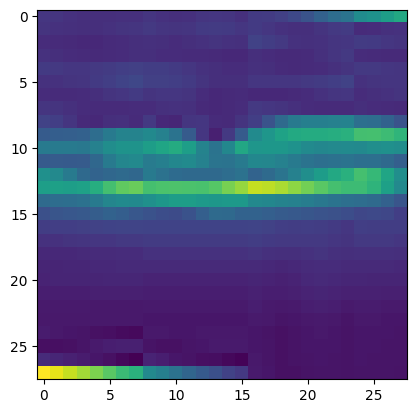

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_oct[sample_index]);
print(f"Label: {y_train_oct[sample_index]}")

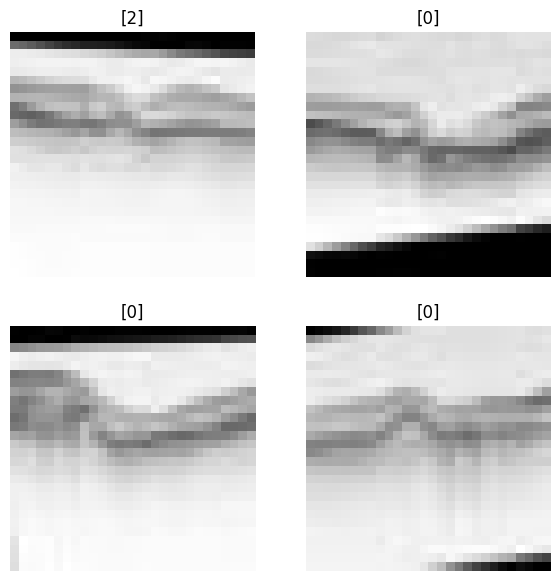

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_oct)))
  plt.imshow(X_train_oct[rand_index], cmap=plt.cm.binary)
  plt.title(y_train_oct[rand_index])
  plt.axis(False)

In [ ]:
y_train_oct = np.array(y_train_oct).ravel()
y_val_oct = np.array(y_val_oct).ravel()
y_test_oct = np.array(y_test_oct).ravel()
y_train_oct.shape, y_val_oct.shape, y_test_oct.shape

((97477,), (10832,), (1000,))

In [ ]:
X_train_oct = X_train_oct / 255
X_test_oct = X_test_oct / 255
X_val_oct = X_val_oct / 255
X_train_oct.min(), X_train_oct.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
X_train_oct = tf.expand_dims(X_train_oct, axis=-1)
X_val_oct = tf.expand_dims(X_val_oct, axis=-1)
X_test_oct = tf.expand_dims(X_test_oct, axis=-1)
X_train_oct.shape, X_val_oct.shape, X_test_oct.shape

(TensorShape([97477, 28, 28, 1]),
 TensorShape([10832, 28, 28, 1]),
 TensorShape([1000, 28, 28, 1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_4 = Sequential()

model_4.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_4.add(Flatten())

# Fully connected layers
model_4.add(Dense(88, activation='leaky_relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(88, activation='leaky_relu'))
model_4.add(Dense(64, activation='leaky_relu'))
model_4.add(Dense(4, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_4.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_4 = model_4.fit(X_train_oct,
                        y_train_oct,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_oct, y_val_oct),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 88)                  │         140,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 88)                  │           7,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,492 (677.70 KB)

 Trainable params: 173,492 (677.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7246 - loss: 0.7337 - val_accuracy: 0.8233 - val_loss: 0.5030
Epoch 2/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8483 - loss: 0.4365 - val_accuracy: 0.8551 - val_loss: 0.4163
Epoch 3/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8661 - loss: 0.3814 - val_accuracy: 0.8741 - val_loss: 0.3556
Epoch 4/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8796 - loss: 0.3417 - val_accuracy: 0.8870 - val_loss: 0.3252
Epoch 5/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8903 - loss: 0.3171 - val_accuracy: 0.8887 - val_loss: 0.3202
Epoch 6/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8972 - loss: 0.2982 - val_accuracy: 0.8915 - val_loss: 0.3165
Epoch 7/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9009 - loss: 0.2851 - val_accuracy: 0.8789 - val_loss: 0.3500
Epoch 8/150
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9067 - loss: 

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_4.evaluate(X_test_oct, y_test_oct)
y_preds_oct = model_4.predict(X_test_oct)
y_preds_oct = y_preds_oct.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_oct, y_preds_oct))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7013 - loss: 0.9758
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Model loss on test set: 0.9207260608673096
Model accuracy on test set: 71.50%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.96      0.73       250
           1       0.95      0.69      0.80       250
           2       0.89      0.26      0.40       250
           3       0.70      0.95      0.80       250

    accuracy                           0.71      1000
   macro avg       0.78      0.71      0.68      1000
weighted avg       0.78      0.71      0.68      1000



In [ ]:
np.save('/kaggle/working/y_preds_oct.npy', y_preds_oct)

## Organ Data

In [ ]:
organa_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/organamnist.npz')
print(len(organa_data))
organa_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
unique_organa = np.unique(organa_data['train_labels'])
print(unique_organa)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
print(organa_data['train_images'].shape)
print(organa_data['val_images'].shape)
print(organa_data['test_images'].shape)
print(organa_data['train_labels'].shape)
print(organa_data['val_labels'].shape)
print(organa_data['test_labels'].shape)

(34581, 28, 28)
(6491, 28, 28)
(17778, 28, 28)
(34581, 1)
(6491, 1)
(17778, 1)


In [ ]:
X_train_organa = organa_data['train_images']
X_val_organa = organa_data['val_images']
X_test_organa = organa_data['test_images']
y_train_organa = organa_data['train_labels']
y_val_organa = organa_data['val_labels']
y_test_organa = organa_data['test_labels']
X_train_organa.shape, y_train_organa.shape

((34581, 28, 28), (34581, 1))

Label: [8]


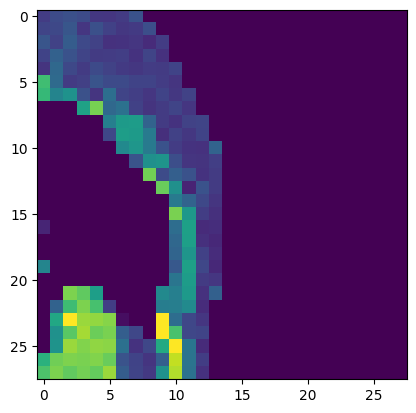

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_organa[sample_index]);
print(f"Label: {y_train_organa[sample_index]}")

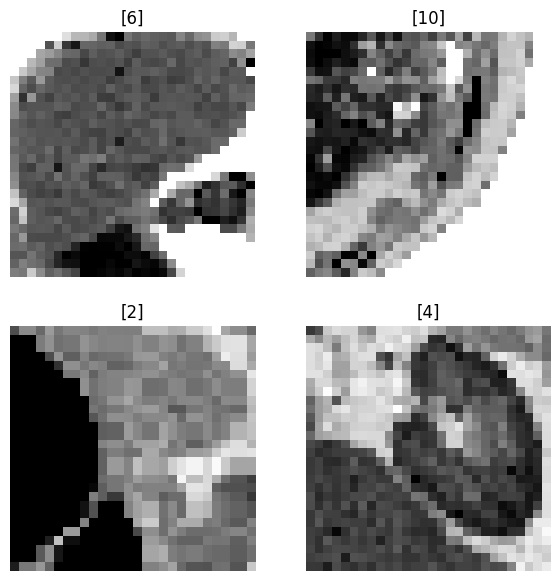

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_organa)))
  plt.imshow(X_train_organa[rand_index], cmap=plt.cm.binary)
  plt.title(y_train_organa[rand_index])
  plt.axis(False)

In [ ]:
y_train_organa = np.array(y_train_organa).ravel()
y_val_organa = np.array(y_val_organa).ravel()
y_test_organa = np.array(y_test_organa).ravel()
y_train_organa.shape, y_val_organa.shape, y_test_organa.shape

((34581,), (6491,), (17778,))

In [ ]:
X_train_organa = X_train_organa / 255
X_test_organa = X_test_organa / 255
X_val_organa = X_val_organa / 255
X_train_organa.min(), X_train_organa.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
X_train_organa = tf.expand_dims(X_train_organa, axis=-1)
X_val_organa = tf.expand_dims(X_val_organa, axis=-1)
X_test_organa = tf.expand_dims(X_test_organa, axis=-1)
X_train_organa.shape, X_val_organa.shape, X_test_organa.shape

(TensorShape([34581, 28, 28, 1]),
 TensorShape([6491, 28, 28, 1]),
 TensorShape([17778, 28, 28, 1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_5 = Sequential()

model_5.add(Conv2D(40, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Conv2D(48, (3, 3), activation='leaky_relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_5.add(Flatten())

# Fully connected layers
model_5.add(Dense(88, activation='leaky_relu'))
model_5.add(Dropout(0.25))
model_5.add(Dense(128, activation='leaky_relu'))
model_5.add(Dense(64, activation='leaky_relu'))
model_5.add(Dense(11, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_5.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_5 = model_5.fit(X_train_organa,
                        y_train_organa,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_organa, y_val_organa),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 40)          │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 48)          │          17,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 88)                  │         105,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          11,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,779 (561.64 KB)

 Trainable params: 143,779 (561.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6157 - loss: 1.0876 - val_accuracy: 0.9364 - val_loss: 0.2230
Epoch 2/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8963 - loss: 0.2960 - val_accuracy: 0.9472 - val_loss: 0.1654
Epoch 3/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9384 - loss: 0.1734 - val_accuracy: 0.9419 - val_loss: 0.2739
Epoch 4/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9575 - loss: 0.1264 - val_accuracy: 0.9509 - val_loss: 0.2154
Epoch 5/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9647 - loss: 0.1000 - val_accuracy: 0.9527 - val_loss: 0.2041
Epoch 6/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9706 - loss: 0.0838 - val_accuracy: 0.9632 - val_loss: 0.1460
Epoch 7/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0779 - val_accuracy: 0.9653 - val_loss: 0.1725
Epoch 8/150
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss:

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_5.evaluate(X_test_organa, y_test_organa)
y_preds_organa = model_5.predict(X_test_organa)
y_preds_organa = y_preds_organa.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_organa, y_preds_organa))

556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.5873
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model loss on test set: 0.6118286848068237
Model accuracy on test set: 86.95%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1036
           1       0.91      0.88      0.90       784
           2       0.95      0.83      0.89       793
           3       0.96      0.82      0.88       785
           4       0.70      0.69      0.70      2064
           5       0.77      0.79      0.78      1965
           6       0.97      0.98      0.97      3285
           7       0.97      0.98      0.97      1747
           8       0.99      0.99      0.99      1813
           9       0.90      0.83      0.86      1622
          10       0.74      0.84      0.79      1884

    accuracy                           0.87     17778
   macro avg       0.88      0.86      0.87   

In [ ]:
np.save('/kaggle/working/y_preds_organa.npy', y_preds_organa)

## Organc Data

In [ ]:
organc_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/organcmnist.npz')
print(len(organc_data))
organc_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
print(organc_data['train_images'].shape)
print(organc_data['val_images'].shape)
print(organc_data['test_images'].shape)
print(organc_data['train_labels'].shape)
print(organc_data['val_labels'].shape)
print(organc_data['test_labels'].shape)

(13000, 28, 28)
(2392, 28, 28)
(8268, 28, 28)
(13000, 1)
(2392, 1)
(8268, 1)


In [ ]:
unique_organc = np.unique(organc_data['train_labels'])
print(unique_organc)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
X_train_organc = organc_data['train_images']
X_val_organc = organc_data['val_images']
X_test_organc = organc_data['test_images']
y_train_organc = organc_data['train_labels']
y_val_organc = organc_data['val_labels']
y_test_organc = organc_data['test_labels']
X_train_organc.shape, y_train_organc.shape

((13000, 28, 28), (13000, 1))

Label: [8]


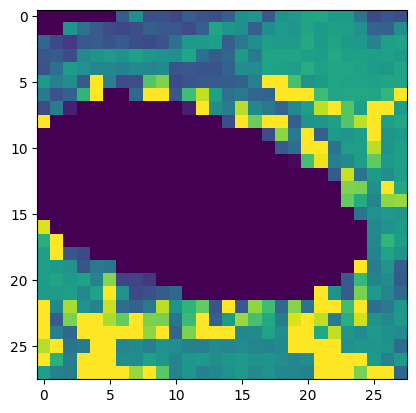

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_organc[sample_index]);
print(f"Label: {y_train_organc[sample_index]}")

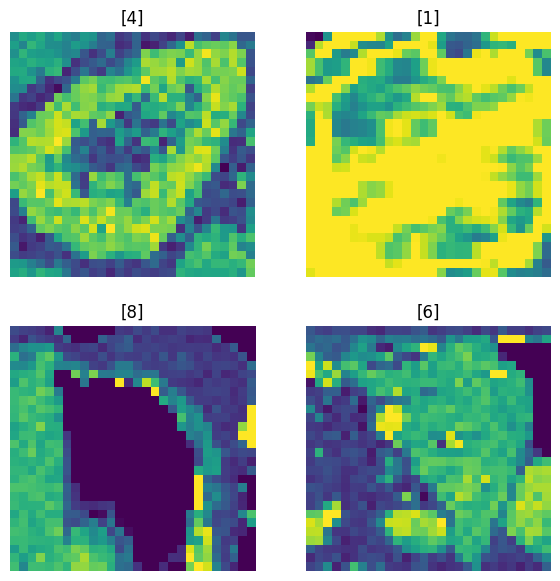

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_organc)))
  plt.imshow(X_train_organc[rand_index])
  plt.title(y_train_organc[rand_index])
  plt.axis(False)

In [ ]:
y_train_organc = np.array(y_train_organc).ravel()
y_val_organc = np.array(y_val_organc).ravel()
y_test_organc = np.array(y_test_organc).ravel()
y_train_organc.shape, y_val_organc.shape, y_test_organc.shape

((13000,), (2392,), (8268,))

In [ ]:
X_train_organc = X_train_organc / 255
X_val_organc = X_val_organc / 255
X_test_organc = X_test_organc / 255
X_train_organc.min() , X_train_organc.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
X_train_organc = tf.expand_dims(X_train_organc, axis=-1)
X_val_organc = tf.expand_dims(X_val_organc, axis=-1)
X_test_organc = tf.expand_dims(X_test_organc, axis=-1)
X_train_organc.shape, X_val_organc.shape, X_test_organc.shape

(TensorShape([13000, 28, 28, 1]),
 TensorShape([2392, 28, 28, 1]),
 TensorShape([8268, 28, 28, 1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_6 = Sequential()

model_6.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

model_6.add(Conv2D(48, (3, 3), activation='leaky_relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_6.add(Flatten())

# Fully connected layers
model_6.add(Dense(128, activation='leaky_relu'))
model_6.add(Dropout(0.25))
model_6.add(Dense(88, activation='leaky_relu'))
model_6.add(Dense(64, activation='leaky_relu'))
model_6.add(Dense(11, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_6.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_6 = model_6.fit(X_train_organc,
                        y_train_organc,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_organc, y_val_organc),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         153,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 88)                  │          11,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,683 (725.32 KB)

 Trainable params: 185,683 (725.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4815 - loss: 1.4711 - val_accuracy: 0.8855 - val_loss: 0.4338
Epoch 2/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0.5361 - val_accuracy: 0.9344 - val_loss: 0.2427
Epoch 3/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.3387 - val_accuracy: 0.9436 - val_loss: 0.2336
Epoch 4/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9060 - loss: 0.2637 - val_accuracy: 0.9415 - val_loss: 0.2580
Epoch 5/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9214 - loss: 0.2222 - val_accuracy: 0.9335 - val_loss: 0.2759
Epoch 6/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9327 - loss: 0.1818 - val_accuracy: 0.9419 - val_loss: 0.2802
Epoch 7/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1550 - val_accuracy: 0.9461 - val_loss: 0.2237
Epoch 8/150
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1325 - val_accu

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_6.evaluate(X_test_organc, y_test_organc)
y_preds_organc = model_6.predict(X_test_organc)
y_preds_organc = y_preds_organc.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_organc, y_preds_organc))

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.6469
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model loss on test set: 0.6159436702728271
Model accuracy on test set: 85.17%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       833
           1       0.71      0.77      0.74       442
           2       0.73      0.84      0.78       441
           3       0.97      0.78      0.87       421
           4       0.72      0.67      0.69       732
           5       0.77      0.71      0.74       737
           6       0.98      0.93      0.95      1836
           7       0.85      0.98      0.91       550
           8       0.97      0.96      0.97       558
           9       0.85      0.90      0.87       750
          10       0.79      0.86      0.82       968

    accuracy                           0.85      8268
   macro avg       0.84      0.84      0.84   

In [ ]:
np.save('/kaggle/working/y_preds_organc.npy', y_preds_organc)

## Organs Data

In [ ]:
organs_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/organsmnist.npz')
print(len(organs_data))
organs_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
unique_organs = np.unique(organs_data['train_labels'])
print(unique_organs)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
print(organs_data['train_images'].shape)
print(organs_data['val_images'].shape)
print(organs_data['test_images'].shape)
print(organs_data['train_labels'].shape)
print(organs_data['val_labels'].shape)
print(organs_data['test_labels'].shape)

(13940, 28, 28)
(2452, 28, 28)
(8829, 28, 28)
(13940, 1)
(2452, 1)
(8829, 1)


In [ ]:
X_train_organs = organs_data['train_images']
X_val_organs = organs_data['val_images']
X_test_organs = organs_data['test_images']
y_train_organs = organs_data['train_labels']
y_val_organs = organs_data['val_labels']
y_test_organs = organs_data['test_labels']
X_train_organs.shape, y_train_organs.shape

((13940, 28, 28), (13940, 1))

Label: [0]


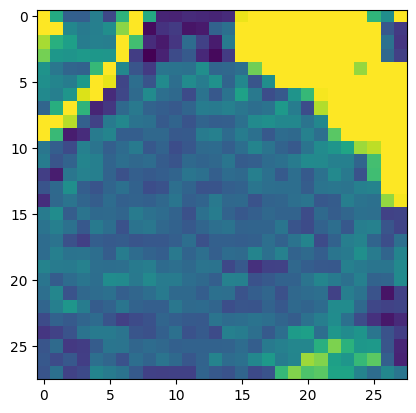

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_organs[sample_index]);
print(f"Label: {y_train_organs[sample_index]}")

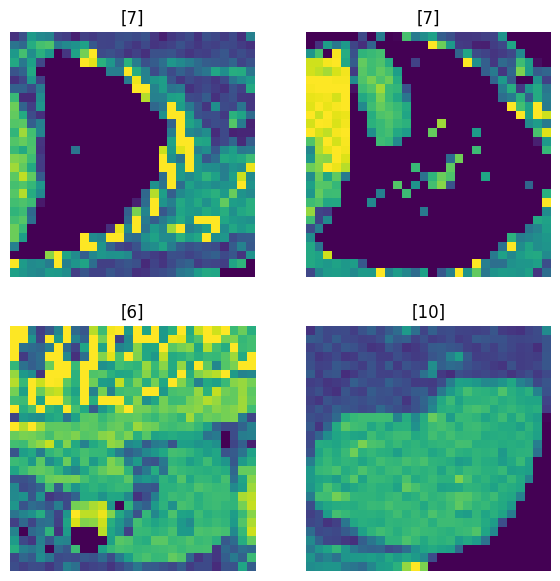

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_organs)))
  plt.imshow(X_train_organs[rand_index])
  plt.title(y_train_organs[rand_index])
  plt.axis(False)

In [ ]:
y_train_organs = np.array(y_train_organs).ravel()
y_val_organs = np.array(y_val_organs).ravel()
y_test_organs = np.array(y_test_organs).ravel()
y_train_organs.shape, y_val_organs.shape, y_test_organs.shape

((13940,), (2452,), (8829,))

In [ ]:
X_train_organs = X_train_organs / 255
X_val_organs = X_val_organs / 255
X_test_organs = X_test_organs / 255
X_train_organs.min() , X_train_organs.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
X_train_organs = tf.expand_dims(X_train_organs, axis=-1)
X_val_organs = tf.expand_dims(X_val_organs, axis=-1)
X_test_organs = tf.expand_dims(X_test_organs, axis=-1)
X_train_organs.shape, X_val_organs.shape, X_test_organs.shape

(TensorShape([13940, 28, 28, 1]),
 TensorShape([2452, 28, 28, 1]),
 TensorShape([8829, 28, 28, 1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_7 = Sequential()

model_7.add(Conv2D(40, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

model_7.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_7.add(Flatten())

# Fully connected layers
model_7.add(Dense(128, activation='leaky_relu'))
model_7.add(Dropout(0.25))
model_7.add(Dense(88, activation='leaky_relu'))
model_7.add(Dense(88, activation='leaky_relu'))
model_7.add(Dense(11, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_7.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_7 = model_7.fit(X_train_organs,
                        y_train_organs,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_organs, y_val_organs),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 26, 26, 40)          │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 64)          │          23,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 88)                  │          11,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 88)                  │           7,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 11)                  │             979 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,595 (971.07 KB)

 Trainable params: 248,595 (971.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3987 - loss: 1.6475 - val_accuracy: 0.7826 - val_loss: 0.6111
Epoch 2/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7120 - loss: 0.7632 - val_accuracy: 0.8361 - val_loss: 0.4302
Epoch 3/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.5587 - val_accuracy: 0.8014 - val_loss: 0.5004
Epoch 4/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8200 - loss: 0.4411 - val_accuracy: 0.8299 - val_loss: 0.4405
Epoch 5/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.3611 - val_accuracy: 0.8467 - val_loss: 0.4581
Epoch 6/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.3139 - val_accuracy: 0.8532 - val_loss: 0.4485
Epoch 7/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.2594 - val_accuracy: 0.8507 - val_loss: 0.4495
Epoch 8/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.2265 - val_acc

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_7.evaluate(X_test_organs, y_test_organs)
y_preds_organs = model_7.predict(X_test_organs)
y_preds_organs = y_preds_organs.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_organs, y_preds_organs))

276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7071 - loss: 1.1844
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model loss on test set: 1.169140100479126
Model accuracy on test set: 71.06%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       811
           1       0.41      0.31      0.35       439
           2       0.51      0.63      0.57       447
           3       0.87      0.71      0.78       510
           4       0.49      0.39      0.43       704
           5       0.48      0.42      0.45       693
           6       0.86      0.95      0.90      2078
           7       0.77      0.87      0.81       397
           8       0.85      0.83      0.84       439
           9       0.71      0.70      0.70      1343
          10       0.67      0.65      0.66       968

    accuracy                           0.71      8829
   macro avg       0.67      0.66      0.66    

In [ ]:
np.save('/kaggle/working/y_preds_organc.npy', y_preds_organc)

## Path Data

In [ ]:
path_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/pathmnist.npz')
print(len(path_data))
path_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
unique_path = np.unique(path_data['train_labels'])
print(unique_path)

[0 1 2 3 4 5 6 7 8]


In [ ]:
print(path_data['train_images'].shape)
print(path_data['val_images'].shape)
print(path_data['test_images'].shape)
print(path_data['train_labels'].shape)
print(path_data['val_labels'].shape)
print(path_data['test_labels'].shape)

(89996, 28, 28, 3)
(10004, 28, 28, 3)
(7180, 28, 28, 3)
(89996, 1)
(10004, 1)
(7180, 1)


In [ ]:
X_train_path = path_data['train_images']
X_val_path = path_data['val_images']
X_test_path = path_data['test_images']
y_train_path = path_data['train_labels']
y_val_path = path_data['val_labels']
y_test_path = path_data['test_labels']
X_train_path.shape, y_train_path.shape

((89996, 28, 28, 3), (89996, 1))

Label: [4]


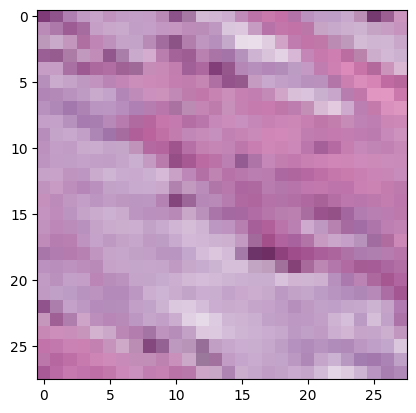

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_path[sample_index]);
print(f"Label: {y_train_path[sample_index]}")

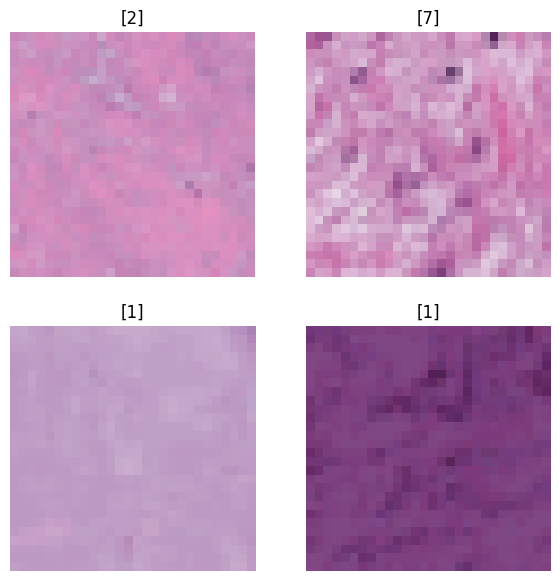

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_path)))
  plt.imshow(X_train_path[rand_index])
  plt.title(y_train_path[rand_index])
  plt.axis(False)

In [ ]:
y_train_path = np.array(y_train_path).ravel()
y_val_path = np.array(y_val_path).ravel()
y_test_path = np.array(y_test_path).ravel()
y_train_path.shape, y_val_path.shape, y_test_path.shape

((89996,), (10004,), (7180,))

In [ ]:
X_train_path = X_train_path / 255
X_val_path = X_val_path / 255
X_test_path = X_test_path / 255
X_train_path.min() , X_train_path.max()

(0.0, 1.0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_8 = Sequential()

model_8.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(28, 28, 3)))
model_8.add(MaxPooling2D(pool_size=(2, 2)))

model_8.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_8.add(Flatten())

# Fully connected layers
model_8.add(Dense(88, activation='leaky_relu'))
model_8.add(Dropout(0.25))
model_8.add(Dense(88, activation='leaky_relu'))
model_8.add(Dense(64, activation='leaky_relu'))
model_8.add(Dense(9, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_8.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_8 = model_8.fit(X_train_path,
                        y_train_path,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_path, y_val_path),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 88)                  │         140,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 88)                  │           7,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,393 (681.22 KB)

 Trainable params: 174,393 (681.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5158 - loss: 1.2778 - val_accuracy: 0.6876 - val_loss: 0.8327
Epoch 2/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7438 - loss: 0.7008 - val_accuracy: 0.7877 - val_loss: 0.5702
Epoch 3/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7857 - loss: 0.5840 - val_accuracy: 0.7548 - val_loss: 0.6887
Epoch 4/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8076 - loss: 0.5247 - val_accuracy: 0.8259 - val_loss: 0.4867
Epoch 5/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8298 - loss: 0.4685 - val_accuracy: 0.8514 - val_loss: 0.4244
Epoch 6/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8406 - loss: 0.4354 - val_accuracy: 0.8466 - val_loss: 0.4223
Epoch 7/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8492 - loss: 0.4099 - val_accuracy: 0.8646 - val_loss: 0.3745
Epoch 8/150
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8635 - loss: 

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_8.evaluate(X_test_path, y_test_path)
y_preds_path = model_8.predict(X_test_path)
y_preds_path = y_preds_path.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_path, y_preds_path))

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8103 - loss: 0.9679
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model loss on test set: 0.9700393080711365
Model accuracy on test set: 80.72%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1338
           1       0.88      1.00      0.94       847
           2       0.26      0.37      0.31       339
           3       0.80      0.91      0.85       634
           4       0.95      0.76      0.85      1035
           5       0.59      0.60      0.59       592
           6       0.87      0.71      0.78       741
           7       0.62      0.40      0.48       421
           8       0.86      0.90      0.88      1233

    accuracy                           0.81      7180
   macro avg       0.75      0.74      0.74      7180
weighted avg       0.82      0.81      0.81      7180



In [ ]:
np.save('/kaggle/working/y_preds_path.npy', y_preds_path)

## Pneumonia Data

In [ ]:
pn_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/pneumoniamnist.npz')
print(len(pn_data))
pn_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
pn_unique = np.unique(pn_data['train_labels'])
print(pn_unique)

[0 1]


In [ ]:
print(pn_data['train_images'].shape)
print(pn_data['val_images'].shape)
print(pn_data['test_images'].shape)
print(pn_data['train_labels'].shape)
print(pn_data['val_labels'].shape)
print(pn_data['test_labels'].shape)

(4708, 28, 28)
(524, 28, 28)
(624, 28, 28)
(4708, 1)
(524, 1)
(624, 1)


In [ ]:
X_train_pn = pn_data['train_images']
X_val_pn = pn_data['val_images']
X_test_pn = pn_data['test_images']
y_train_pn = pn_data['train_labels']
y_val_pn = pn_data['val_labels']
y_test_pn = pn_data['test_labels']
X_train_pn.shape, y_train_pn.shape

((4708, 28, 28), (4708, 1))

Label: [1]


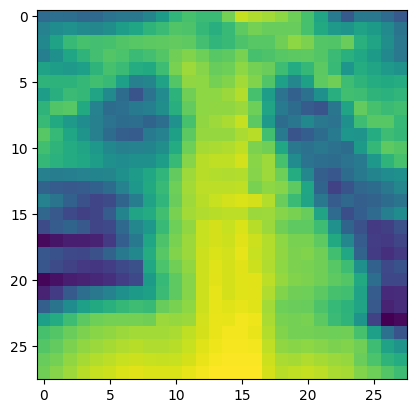

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_pn[sample_index]);
print(f"Label: {y_train_pn[sample_index]}")

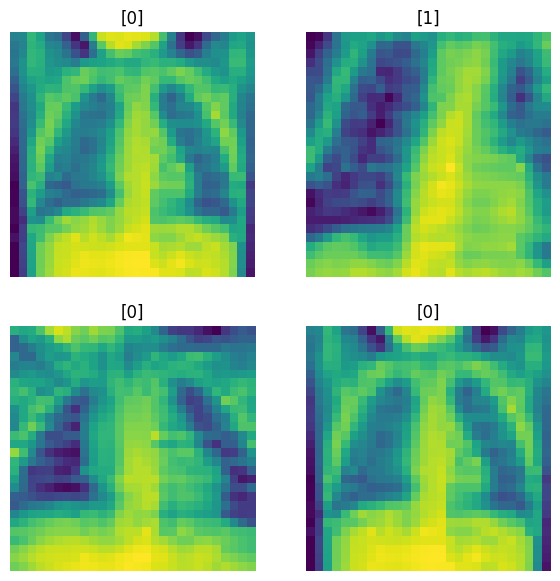

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_pn)))
  plt.imshow(X_train_pn[rand_index])
  plt.title(y_train_pn[rand_index])
  plt.axis(False)

In [ ]:
y_train_pn = np.array(y_train_pn).ravel()
y_val_pn = np.array(y_val_pn).ravel()
y_test_pn = np.array(y_test_pn).ravel()
y_train_pn.shape, y_val_pn.shape, y_test_pn.shape

((4708,), (524,), (624,))

In [ ]:
X_train_pn = X_train_pn / 255
X_val_pn = X_val_pn / 255
X_test_pn = X_test_pn / 255
X_train_pn.min() , X_train_pn.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
X_train_pn = tf.expand_dims(X_train_pn, axis=-1)
X_val_pn = tf.expand_dims(X_val_pn, axis=-1)
X_test_pn = tf.expand_dims(X_test_pn, axis=-1)
X_train_pn.shape, X_val_pn.shape, X_test_pn.shape

(TensorShape([4708, 28, 28, 1]),
 TensorShape([524, 28, 28, 1]),
 TensorShape([624, 28, 28, 1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_9 = Sequential()

model_9.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
model_9.add(MaxPooling2D(pool_size=(2, 2)))

model_9.add(Conv2D(56, (3, 3), activation='leaky_relu'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_9.add(Flatten())

# Fully connected layers
model_9.add(Dense(88, activation='leaky_relu'))
model_9.add(Dropout(0.25))
model_9.add(Dense(88, activation='leaky_relu'))
model_9.add(Dense(64, activation='leaky_relu'))
model_9.add(Dense(1, activation='sigmoid'))  # Output layer for multi-class classification

# Compile the model
model_9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_9.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_9 = model_9.fit(X_train_pn,
                        y_train_pn,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_pn, y_val_pn),
                        callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 56)          │          16,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 88)                  │         123,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 88)                  │           7,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,385 (599.16 KB)

 Trainable params: 153,385 (599.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7741 - loss: 0.4662 - val_accuracy: 0.9198 - val_loss: 0.1947
Epoch 2/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9327 - loss: 0.1756 - val_accuracy: 0.9523 - val_loss: 0.1238
Epoch 3/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9369 - loss: 0.1406 - val_accuracy: 0.9676 - val_loss: 0.1099
Epoch 4/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.1757 - val_accuracy: 0.9618 - val_loss: 0.0951
Epoch 5/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9494 - loss: 0.1244 - val_accuracy: 0.9466 - val_loss: 0.1268
Epoch 6/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9627 - loss: 0.0941 - val_accuracy: 0.9695 - val_loss: 0.0966
Epoch 7/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.0776 - val_accuracy: 0.9714 - val_loss: 0.0779
Epoch 8/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.0804 - val_acc

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_9.evaluate(X_test_pn, y_test_pn)
y_preds_pn = model_9.predict(X_test_pn)
y_preds_pn = (y_preds_pn > .5).astype(int)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_pn, y_preds_pn))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8430 - loss: 0.5678
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Model loss on test set: 0.5174147486686707
Model accuracy on test set: 84.46%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.61      0.75       234
           1       0.81      0.98      0.89       390

    accuracy                           0.84       624
   macro avg       0.88      0.80      0.82       624
weighted avg       0.87      0.84      0.83       624



In [ ]:
np.save('/kaggle/working/y_preds_pn.npy', y_preds_pn)

## Retina Data

In [ ]:
retina_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/retinamnist.npz')
print(len(retina_data))
retina_data.files

6


['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
unique_retina = np.unique(retina_data['train_labels'])
print(unique_retina)

[0 1 2 3 4]


In [ ]:
print(retina_data['train_images'].shape)
print(retina_data['val_images'].shape)
print(retina_data['test_images'].shape)
print(retina_data['train_labels'].shape)
print(retina_data['val_labels'].shape)
print(retina_data['test_labels'].shape)

(1080, 28, 28, 3)
(120, 28, 28, 3)
(400, 28, 28, 3)
(1080, 1)
(120, 1)
(400, 1)


In [ ]:
X_train_retina = retina_data['train_images']
X_val_retina = retina_data['val_images']
X_test_retina = retina_data['test_images']
y_train_retina = retina_data['train_labels']
y_val_retina = retina_data['val_labels']
y_test_retina = retina_data['test_labels']
X_train_retina.shape, y_train_retina.shape

((1080, 28, 28, 3), (1080, 1))

Label: [0]


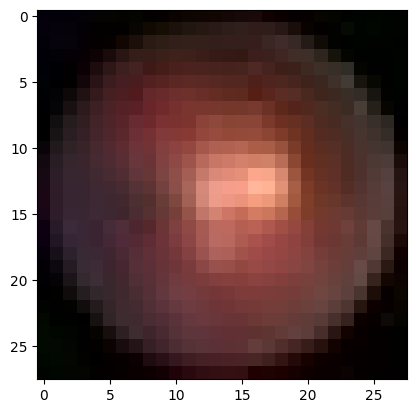

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_retina[sample_index]);
print(f"Label: {y_train_retina[sample_index]}")

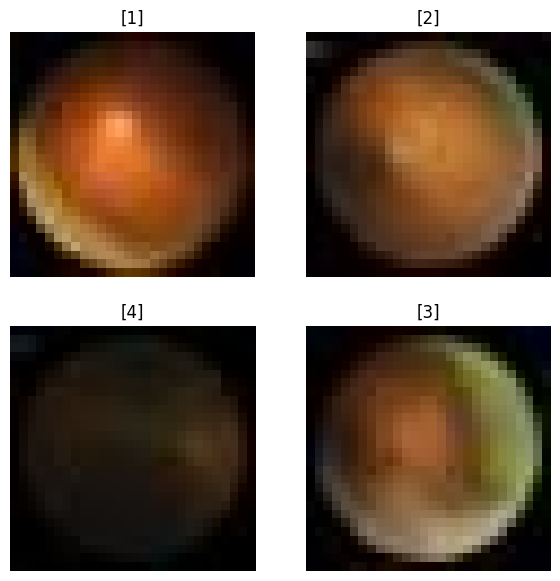

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_retina)))
  plt.imshow(X_train_retina[rand_index])
  plt.title(y_train_retina[rand_index])
  plt.axis(False)

In [ ]:
y_train_retina = np.array(y_train_retina).ravel()
y_val_retina = np.array(y_val_retina).ravel()
y_test_retina = np.array(y_test_retina).ravel()
y_train_retina.shape, y_val_retina.shape, y_test_retina.shape

((1080,), (120,), (400,))

In [ ]:
X_train_retina = X_train_retina / 255
X_val_retina = X_val_retina / 255
X_test_retina = X_test_retina / 255
X_train_retina.min() , X_train_retina.max()

(0.0, 1.0)

In [ ]:
# Define Model for Hyperparameter Tuning
def create_model(hp):

    model = Sequential()

    model.add(Conv2D(
        filters=hp.Int('neurons1', min_value=8, max_value=64, step=8),
        kernel_size=(3, 3),
        activation='leaky_relu',
        input_shape=(28, 28, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('neurons2', min_value=8, max_value=64, step=8),
        kernel_size=(3, 3),
        activation='leaky_relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten(input_shape=(28, 28, 3)))
    model.add(Dense(units=hp.Int('neurons3', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=hp.Int('neurons4', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(units=hp.Int('neurons5', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(units=hp.Int('neurons6', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(8, activation='softmax'))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up KerasTuner
tuner = kt.Hyperband(
    create_model,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='/kaggle/working/tuning_results8',
    project_name='tuning_example8'
)

# Perform the search
tuner.search(X_train_retina, y_train_retina, epochs=5, validation_data=(X_val_retina, y_val_retina))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Model: {best_model}")
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Best val_accuracy So Far: 0.550000011920929
# Total elapsed time: 00h 03m 41s
# Best Model: <Sequential name=sequential, built=True>
# Best Hyperparameters: {'neurons1': 64, 'neurons2': 64,
#                        'neurons3': 40, 'neurons4': 104,
#                        'neurons5': 120, 'neurons6': 24,
#                        'optimizer': 'adam', 'tuner/epochs': 5,
#                        'tuner/initial_epoch': 2, 'tuner/bracket': 1,
#                        'tuner/round': 1, 'tuner/trial_id': '0009'}

Trial 29 Complete [00h 00m 06s]
val_accuracy: 0.4583333432674408

Best val_accuracy So Far: 0.550000011920929
Total elapsed time: 00h 03m 41s
Best Model: <Sequential name=sequential, built=True>
Best Hyperparameters: {'neurons1': 64, 'neurons2': 64, 'neurons3': 40, 'neurons4': 104, 'neurons5': 120, 'neurons6': 24, 'optimizer': 'adam', 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0009'}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_10 = Sequential()

model_10.add(Conv2D(64, (3, 3), activation='leaky_relu', input_shape=(28, 28, 3)))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

model_10.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_10.add(Flatten())

# Fully connected layers
model_10.add(Dense(40, activation='leaky_relu'))
model_10.add(Dropout(0.25))
model_10.add(Dense(104, activation='leaky_relu'))
model_10.add(Dense(120, activation='leaky_relu'))
model_10.add(Dense(24, activation='leaky_relu'))
model_10.add(Dense(5, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_10.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_10 = model_10.fit(X_train_retina,
                        y_train_retina,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_retina, y_val_retina),
                        callbacks=[early_stopping])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 40)                  │          64,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 104)                 │           4,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │           2,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,653 (479.11 KB)

 Trainable params: 122,653 (479.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - accuracy: 0.3749 - loss: 1.4923 - val_accuracy: 0.4500 - val_loss: 1.3167
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4422 - loss: 1.3267 - val_accuracy: 0.4333 - val_loss: 1.2070
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4970 - loss: 1.2016 - val_accuracy: 0.5583 - val_loss: 1.1610
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5100 - loss: 1.2335 - val_accuracy: 0.4667 - val_loss: 1.1855
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4961 - loss: 1.2067 - val_accuracy: 0.4833 - val_loss: 1.1586
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5160 - loss: 1.1909 - val_accuracy: 0.5167 - val_loss: 1.1016
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4974 - loss: 1.1812 - val_accuracy: 0.4500 - val_loss: 1.1395
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5038 - loss: 1.1963 - val_accuracy: 0.5250 

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_10.evaluate(X_test_retina, y_test_retina)
y_preds_retina = model_10.predict(X_test_retina)
y_preds_retina = y_preds_retina.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_retina, y_preds_retina))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5655 - loss: 1.1199
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model loss on test set: 1.1933163404464722
Model accuracy on test set: 53.75%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       174
           1       0.23      0.15      0.18        46
           2       0.35      0.34      0.34        92
           3       0.40      0.65      0.49        68
           4       0.43      0.15      0.22        20

    accuracy                           0.54       400
   macro avg       0.44      0.41      0.40       400
weighted avg       0.54      0.54      0.53       400



In [ ]:
np.save('/kaggle/working/y_preds_retina.npy', y_preds_retina)

## Tissue Data

In [ ]:
tissue_data = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/tissuemnist.npz')
print(len(tissue_data))
tissue_data.files

6


['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [ ]:
print(tissue_data['train_images'].shape)
print(tissue_data['val_images'].shape)
print(tissue_data['test_images'].shape)
print(tissue_data['train_labels'].shape)
print(tissue_data['val_labels'].shape)
print(tissue_data['test_labels'].shape)

(165466, 28, 28)
(23640, 28, 28)
(47280, 28, 28)
(165466, 1)
(23640, 1)
(47280, 1)


In [ ]:
unique_tissue = np.unique(tissue_data['train_labels'])
print(unique_tissue)

[0 1 2 3 4 5 6 7]


In [ ]:
X_train_tissue = tissue_data['train_images']
X_val_tissue = tissue_data['val_images']
X_test_tissue = tissue_data['test_images']
y_train_tissue = tissue_data['train_labels']
y_val_tissue = tissue_data['val_labels']
y_test_tissue = tissue_data['test_labels']
X_train_tissue.shape, y_train_tissue.shape

((165466, 28, 28), (165466, 1))

Label: [0]


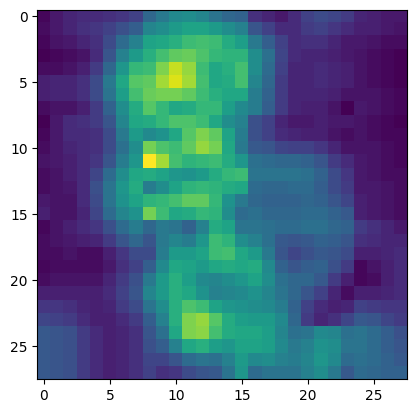

In [ ]:
import matplotlib.pyplot as plt
sample_index = 1
plt.imshow(X_train_tissue[sample_index]);
print(f"Label: {y_train_tissue[sample_index]}")

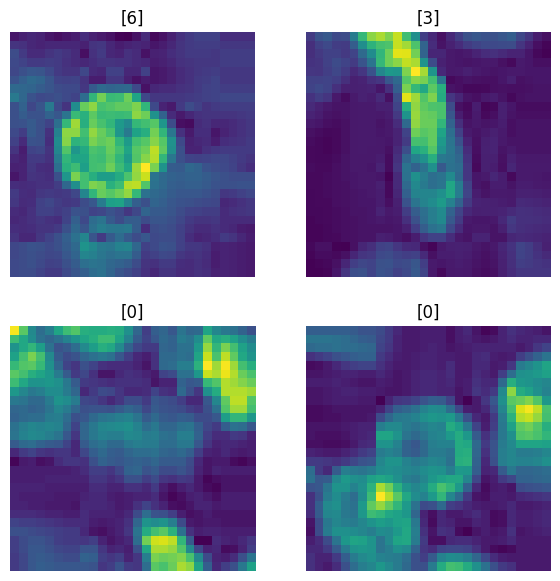

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train_tissue)))
  plt.imshow(X_train_tissue[rand_index])
  plt.title(y_train_tissue[rand_index])
  plt.axis(False)

In [ ]:
y_train_tissue = np.array(y_train_tissue).ravel()
y_val_tissue = np.array(y_val_tissue).ravel()
y_test_tissue = np.array(y_test_tissue).ravel()
y_train_tissue.shape, y_val_tissue.shape, y_test_tissue.shape

((165466,), (23640,), (47280,))

In [ ]:
X_train_tissue = X_train_tissue / 255
X_val_tissue = X_val_tissue / 255
X_test_tissue = X_test_tissue / 255
X_train_tissue.min() , X_train_tissue.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
X_train_tissue = tf.expand_dims(X_train_tissue, axis=-1)
X_val_tissue = tf.expand_dims(X_val_tissue, axis=-1)
X_test_tissue = tf.expand_dims(X_test_tissue, axis=-1)
X_train_tissue.shape, X_val_tissue.shape, X_test_tissue.shape

(TensorShape([165466, 28, 28, 1]),
 TensorShape([23640, 28, 28, 1]),
 TensorShape([47280, 28, 28, 1]))

In [ ]:
# Define Model for Hyperparamter Tuning
def create_model(hp):

    model = Sequential()

    model.add(Conv2D(
        filters=hp.Int('neurons1', min_value=8, max_value=64, step=8),
        kernel_size=(3, 3),
        activation='leaky_relu',
        input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('neurons2', min_value=8, max_value=64, step=8),
        kernel_size=(3, 3),
        activation='leaky_relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten(input_shape=(28, 28, 3)))
    model.add(Dense(units=hp.Int('neurons3', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=hp.Int('neurons4', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(units=hp.Int('neurons5', min_value=8, max_value=128, step=16), activation='leaky_relu'))
    model.add(Dense(8, activation='softmax'))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up KerasTuner
tuner = kt.Hyperband(
    create_model,
    objective='val_accuracy',
    max_epochs=5,
    hyperband_iterations=3,
    directory='/kaggle/working/tuning_results9',
    project_name='tuning_example9'
)

# Perform the search
tuner.search(X_train_tissue, y_train_tissue, epochs=5, validation_data=(X_val_tissue, y_val_tissue))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Model: {best_model}")
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Best val_accuracy So Far: 0.59978848695755
# Total elapsed time: 00h 18m 06s
# Best Model: <Sequential name=sequential, built=True>
# Best Hyperparameters: {'neurons1': 40, 'neurons2': 56,
#                        'neurons3': 72, 'neurons4': 120,
#                        'neurons5': 56, 'optimizer': 'adam',
#                        'tuner/epochs': 5, 'tuner/initial_epoch': 0,
#                        'tuner/bracket': 0, 'tuner/round': 0}

Trial 28 Complete [00h 01m 05s]
val_accuracy: 0.5885787010192871

Best val_accuracy So Far: 0.59978848695755
Total elapsed time: 00h 18m 06s
Best Model: <Sequential name=sequential, built=True>
Best Hyperparameters: {'neurons1': 40, 'neurons2': 56, 'neurons3': 72, 'neurons4': 120, 'neurons5': 56, 'optimizer': 'adam', 'tuner/epochs': 5, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_11 = Sequential()

model_11.add(Conv2D(40, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

model_11.add(Conv2D(56, (3, 3), activation='leaky_relu'))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_11.add(Flatten())

# Fully connected layers
model_11.add(Dense(72, activation='leaky_relu'))
model_11.add(Dropout(0.25))
model_11.add(Dense(120, activation='leaky_relu'))
model_11.add(Dense(56, activation='leaky_relu'))
model_11.add(Dense(8, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model_11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_11.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_11 = model_11.fit(X_train_tissue,
                        y_train_tissue,
                        epochs=150,
                        verbose=True,
                        validation_data=(X_val_tissue, y_val_tissue),
                        callbacks=[early_stopping])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 40)          │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 56)          │          20,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 72)                  │         100,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 120)                 │           8,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 56)                  │           6,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             456 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137,480 (537.03 KB)

 Trainable params: 137,480 (537.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4810 - loss: 1.3900 - val_accuracy: 0.5482 - val_loss: 1.1991
Epoch 2/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5588 - loss: 1.1786 - val_accuracy: 0.5753 - val_loss: 1.1423
Epoch 3/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5782 - loss: 1.1319 - val_accuracy: 0.5912 - val_loss: 1.1058
Epoch 4/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5902 - loss: 1.0990 - val_accuracy: 0.5929 - val_loss: 1.0967
Epoch 5/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5988 - loss: 1.0786 - val_accuracy: 0.6022 - val_loss: 1.0705
Epoch 6/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6083 - loss: 1.0584 - val_accuracy: 0.5995 - val_loss: 1.0905
Epoch 7/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6133 - loss: 1.0424 - val_accuracy: 0.6143 - val_loss: 1.0548
Epoch 8/150
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6171 -

In [ ]:
from sklearn.metrics import classification_report
loss, accuracy = model_11.evaluate(X_test_tissue, y_test_tissue)
y_preds_tissue = model_11.predict(X_test_tissue)
y_preds_tissue = y_preds_tissue.argmax(axis=1)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
print("-------------------------------------------------------")
print(classification_report(y_test_tissue, y_preds_tissue))

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6279 - loss: 1.0290
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model loss on test set: 1.0351297855377197
Model accuracy on test set: 62.48%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     15165
           1       0.44      0.13      0.21      2233
           2       0.44      0.43      0.44      1677
           3       0.61      0.55      0.58      4402
           4       0.46      0.54      0.49      3369
           5       0.43      0.36      0.39      2202
           6       0.68      0.69      0.69     11201
           7       0.56      0.57      0.57      7031

    accuracy                           0.62     47280
   macro avg       0.54      0.51      0.51     47280
weighted avg       0.62      0.62      0.62     47280



In [ ]:
np.save('/kaggle/working/y_preds_tissue.npy', y_preds_tissue)

## Submission

In [ ]:
# Submission
predictions_dict = {
    'bloodmnist': (X_test_blood, y_preds_blood),
    'breastmnist': (X_test_breast, y_preds_breast),
    'dermamnist': (X_test_derma, y_preds_derma),
    'octmnist': (X_test_oct, y_preds_oct),
    'organamnist': (X_test_organa, y_preds_organa),
    'organcmnist': (X_test_organc, y_preds_organc),
    'organsmnist': (X_test_organs, y_preds_organs),
    'pathmnist': (X_test_path, y_preds_path),
    'pneumoniamnist': (X_test_pn, y_preds_pn),
    'retinamnist': (X_test_retina, y_preds_retina),
    'tissuemnist': (X_test_tissue, y_preds_tissue)
}

submission_data = []

for task_name, (X_test, y_pred) in predictions_dict.items():
    for i, (image, label) in enumerate(zip(X_test, y_pred)):

        submission_data.append({
            'id': i,
            'id_image_in_task': i,
            'task_name': task_name,
            'label': label
        })

submission_df = pd.DataFrame(submission_data)

submission_df.to_csv('submission.csv', index=False)

print(submission_df.head())


   id  id_image_in_task   task_name label
0   0                 0  bloodmnist     3
1   1                 1  bloodmnist     0
2   2                 2  bloodmnist     1
3   3                 3  bloodmnist     3
4   4                 4  bloodmnist     5


In [ ]:
submission_df.to_csv('/kaggle/working/submission.csv', index=False)